# Make code for PCA with Kernel

In [2]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np

def rbf_kernel_pca(X, gamma, n_components):
    """
    PCA with RBF kernel
    
    param
    ----------
    X: {Numpy ndarray}, shape = {n_samples, n_features}
    gamma: float, tunnel param of RBF kernel
    n_components: int, retrun
    
    return
    ----------
    X_pc: {Numpy ndarray}, shape = {n_samples, k_features}
    射影されたデータセット
    
    """
    
    # M x N次元のデータセットで、ペアごとのユークリッド距離を計算（2乗）
    sq_dists = pdist(X, 'sqeuclidean')
    
    # ペアごとの距離を正方行列に格納
    mat_sq_dists = squareform(sq_dists)
    
    # 対称カーネル行列を計算
    K = exp(-gamma * mat_sq_dists)
    
    # カーネル行列を中心化
    N = K.shape[0]
    one_n = np.ones((N,N)) / N
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
    
    # 中心化されたカーネル行列から固有対を取得
    # scipy.linalg.eighが昇順で返してくれる
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:, ::-1]
    
    # 上位k個の固有ベクトル（主成分軸に射影済みのサンプル）を収集
    X_pc = np.column_stack((eigvecs[:, i] for i in range(n_components)))
    
    return X_pc

### rbf_kernel_pcaに非線形のデータセットを適用してみる

100個のサンプル点で構成される2次元データセットをつくる

<function matplotlib.pyplot.show(*args, **kw)>

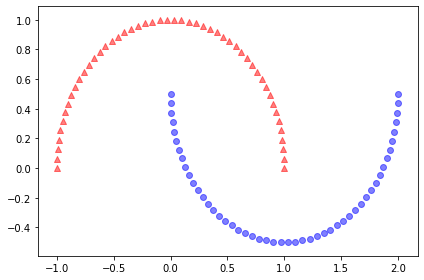

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
%matplotlib inline

X, y = make_moons(n_samples=100, random_state=123)

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
plt.tight_layout()
plt.show

いったんこのデータをそのまま単なるPCAに適用してみる

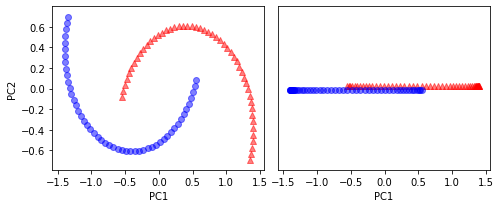

In [4]:
from sklearn.decomposition import PCA

scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

# グラフの数、配置、サイズを指定
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,3))

# 1番目のグラフ領域に散布図をプロット
ax[0].scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', marker='o', alpha=0.5)

# 2番目のグラフ領域に散布図をプロット
ax[1].scatter(X_spca[y==0, 0], np.zeros((50,1))+0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_spca[y==1, 0], np.zeros((50,1))-0.02, color='blue', marker='o', alpha=0.5)

ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.tight_layout()
plt.show()
